In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
# 一维度数据变成二维
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) 
# x 的平方并加点噪声
y = x.pow(2) + 0.2 * torch.rand(x.size()) 

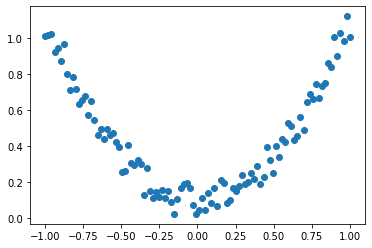

In [3]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [4]:
# 构建网络
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # hidden layer
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        # activation function for hidden layer
        x = F.relu(self.hidden(x))
        # linear output
        x = self.predict(x)
        return x

In [5]:
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [6]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [7]:
plt.ion()   # something about plotting

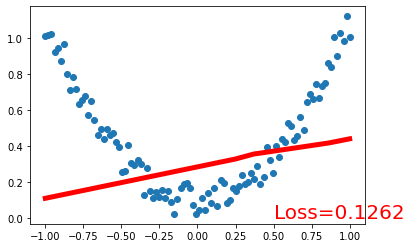

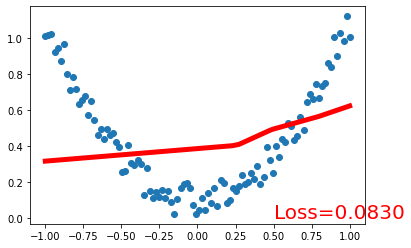

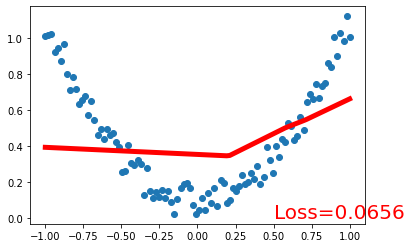

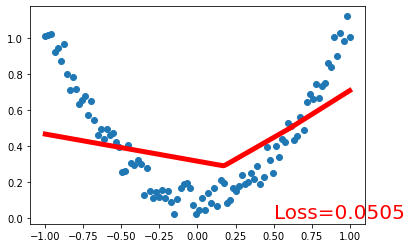

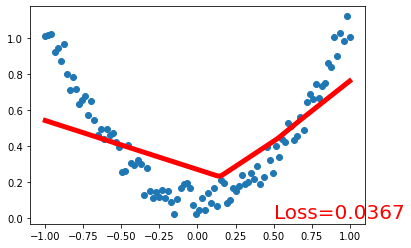

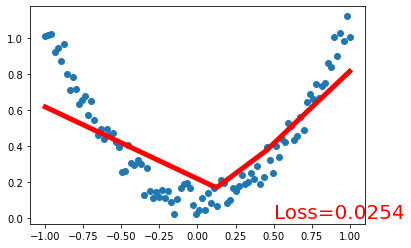

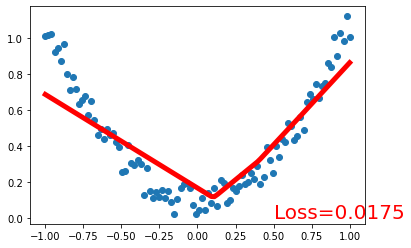

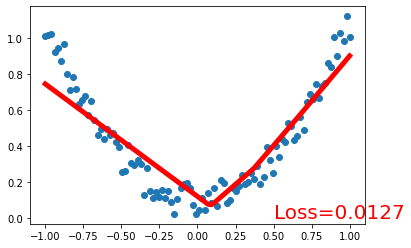

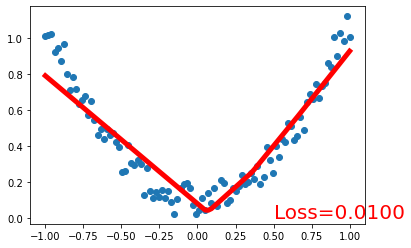

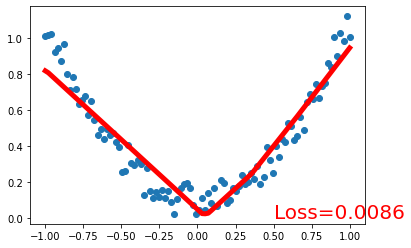

In [8]:
for t in range(200):
    # input x and predict based on x
    prediction = net(x) 
    # must be (1. nn output, 2. target)
    loss = loss_func(prediction, y)
    
    # clear gradients for next train
    optimizer.zero_grad()
    # backpropagation, compute gradients
    loss.backward()
    # apply gradients
    optimizer.step()
    
    if t % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)